Root keys: ['pulse', 'respiration', 'time']



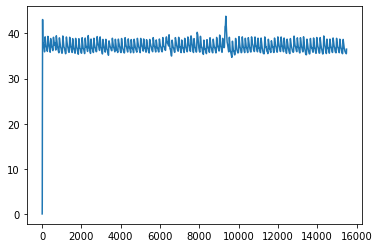

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

# Open the HDF5 file
file_path = 'data.hdf5'
file = h5py.File(file_path, 'r')

# Print the keys at the root level of the HDF5 file
print("Root keys:", list(file.keys()))

# Access a specific dataset within the file
ppg = np.asarray(file['pulse'])
plt.plot(ppg)

# dataset = file[dataset_name]

# Get information about the dataset
# print("Dataset shape:", datas)

print()



# Close the HDF5 file
file.close()


In [2]:
print(len(ppg))
l = len(ppg)

15488


In [3]:
import numpy as np

def normalize_array(arr):
    # Convert the array to a NumPy array
    arr = np.array(arr)
    
    # Find the minimum and maximum values in the array
    min_val = np.min(arr)
    max_val = np.max(arr)
    
    # Normalize the array
    normalized_arr = (arr - min_val) / (max_val - min_val)
    
    return normalized_arr


In [4]:
# ppg = ppg[256:15216]
g_t = ppg[256:l-256]
print(len(g_t))



14976


In [5]:
green_norm = normalize_array(g_t)

15488
14976


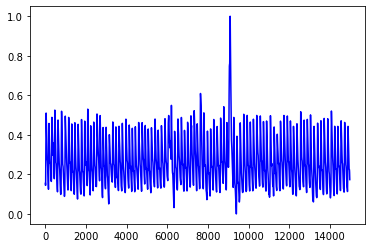

In [6]:
# plt.plot(ppg)
print(len(ppg))
plt.plot(green_norm,'b')
print(len(green_norm))


In [18]:
def Fastft(data_buffer, fps):
    L = len(data_buffer)
    freqs = float(fps) / L * np.arange(L / 2 + 1)
    freqs_in_mins = 60. * freqs
    raw_fft = np.fft.rfft(data_buffer*30)
    fft = np.abs(raw_fft)**2
    interest_idx = np.where((freqs_in_mins > 48) & (freqs_in_mins < 240))[0]
    freqs_of_interest = freqs_in_mins[interest_idx]
    fft_of_interest = fft[interest_idx]
    max_arg = np.argmax(fft_of_interest)
    peak_value = fft_of_interest[max_arg]
    bpm = freqs_of_interest[max_arg]
    
    return bpm,freqs_of_interest,fft_of_interest

In [22]:
bpm,freqs_of_interest,fft_of_interest = Fastft(green_norm,20)

In [23]:
print(bpm)

50.881410256410255


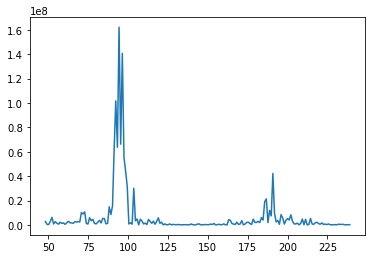

In [21]:
plt.plot(freqs_of_interest,fft_of_interest)